# Adaptive Filters
## LMS and Normalized LMS

Assignment:<br>See Lecture 6, slide 15<br> a.	Reproduce paragraph 6.7<br> b.	Chapter 6, problem 17<br>See Lecture 7, slide 13<br> c.	Chapter 7, problem 10 (which continues from problem 6.17)<br>
***
<center>Natanael Magno Gomes <b>397645</b></center>

***

In [1]:
#------------------------------------------------
# Import the libraries and config the environment
#------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# warnings.filterwarnings("ignore")

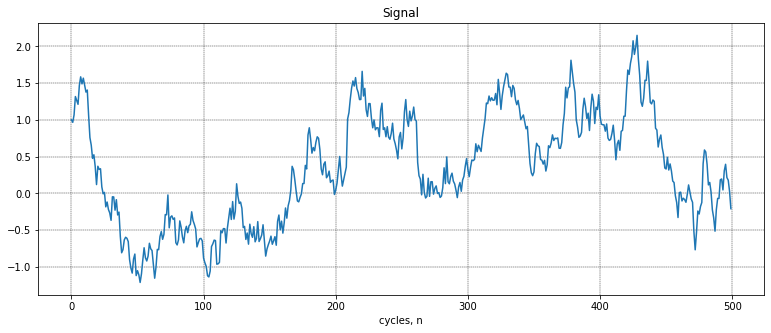

In [2]:
#------------------------------------------------
# Reproduce paragraph 6.7
#------------------------------------------------

# The difference formula is u(n) = -a * u(n - 1) + v(n)
# Let's create a function to create the signal with a
# given initial condition, the parameter a and sigma.

def ar(nsample, ic = 1, a = -0.99, sigma = 0.1709):  # sigma_square = 0.936 sigma = 0.1342 sigma = 0.213759
    v = np.random.normal(0,sigma,nsample)
    u = np.zeros(nsample)
    u[0] = ic
    for n in range(1,nsample,1):
        u[n] = (-1) * a * u[n-1] + v[n]
    return u

# initialize the random seed
np.random.seed(42) # the answer to life the universe and everything: 42
nsample = 500

u = ar(nsample, ic = 1)

# Plot
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Signal')
ax.plot(u)
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

The variance is 0.936


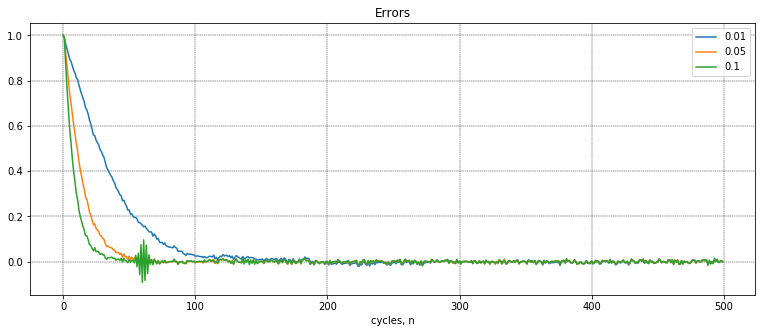

In [3]:
# for this experiment the LMS filter has only one tap

init = 1
carlos = 1000
mus = 3
y = np.zeros(nsample)
e = np.zeros((nsample,mus,carlos))
taps = np.zeros((nsample,mus,carlos))
mu = np.zeros(mus)
mu[0] = 0.01
mu[1] = 0.05
mu[2] = 0.1
stddev = np.zeros(carlos)

#run 100 Monte Carlos simulations to calculate the mean
for i in range(carlos):
    #for each simulation there is an u[n]
    u = ar(nsample, ic = init)
    stddev[i] = np.std(u)
    e[0,:,i] = u[0]
    # run for the 3 mu
    for k in range(mus):
        # The LMS Filter for just one tap weight
        w = 0
        for n in range(1,nsample,1):
            # calculating step
            y[n] = u[n-1] * w
            # updating step
            e[n,k,i] = u[n] - y[n]
            w = w + mu[k] * u[n-1] * e[n,k,i]
            taps[n,k,i] = w
# Calculate the mean
f = np.zeros((nsample,mus))
for k in range(mus):
    f[:,k] = np.mean(e[:,k,:], axis=1)

print('The variance is {:0.3f}'.format(np.mean(stddev) ** 2))

# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Errors')
for k in range(mus):
    ax.plot(f[:,k],label=mu[k])
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

As expected the bigger 𝜇 convert faster to a small error, but also can be unstable. For this example it is possible to see the small unstability around 60 to 70 cicles, for 𝜇 = 0.1. For the others 𝜇 the system is completely stable. It was used 1000 Monte Carlo simulations and averaged to compute the result.
The book states that the variance of the process is $\\𝜎^2 = 0.936$, but to archieve this variance it is necessary to use a smaller standart deviation for the noise v[n], $\\𝜎 = 0.1709$, resulting a overall variance of the process as described on the book.

\begin{align} \mu \end{align}

C:\Users\natan\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars
C:\Users\natan\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\natan\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars


The variance is 0.900


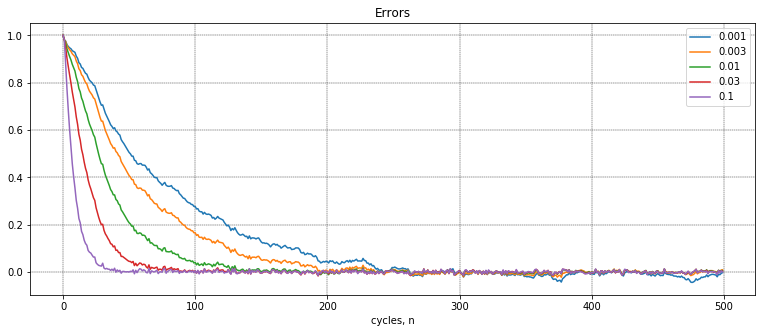

In [4]:
#------------------------------------------------
# Chapter 6, problem 19
# This one is an extra, it was on the previous assignment list
#------------------------------------------------
# Repeat the experiment on the learning curve of the first-order adaptive predictor plotted
# in Fig. 6.18, but this time use the following values for the step-size parameter: 0.001, 0.003,
# 0.01, 0.03, 0.1, 0.3, 1, 3.
# Comment on the results so obtained.
#------------------------------------------------
# To solve this exercise it is used the same code from the previous exercise
# adapted for these.

init = 1
carlos = 1000
mus = 8
y = np.zeros(nsample)
e = np.zeros((nsample,mus,carlos))
taps = np.zeros((nsample,mus,carlos))
mu = np.zeros(mus)
mu[0] = 0.001
mu[1] = 0.003
mu[2] = 0.01
mu[3] = 0.03
mu[4] = 0.1
mu[5] = 0.3
mu[6] = 1
mu[7] = 3
stddev = np.zeros(carlos)

#run 100 Monte Carlos simulations to calculate the mean
for i in range(carlos):
    #for each simulation there is an u[n]
    u = ar(nsample, ic = init)
    stddev[i] = np.std(u)
    e[0,:,i] = u[0]
    # run for the 3 mu
    for k in range(mus):
        # The LMS Filter for just one tap weight
        w = 0
        for n in range(1,nsample,1):
            # calculating step
            y[n] = u[n-1] * w
            # updating step
            e[n,k,i] = u[n] - y[n]
            w = w + mu[k] * u[n-1] * e[n,k,i]
            taps[n,k,i] = w
# Calculate the mean
f = np.zeros((nsample,mus))
for k in range(mus):
    f[:,k] = np.mean(e[:,k,:], axis=1)

print('The variance is {:0.3f}'.format(np.mean(stddev) ** 2))

# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Errors')
for k in range(5):
    ax.plot(f[:,k],label=mu[k])
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()


It is necessary to split the last two 𝜇, because they result in unstable response and the change of the scale does not allow the visualisation. They are on the graphs below.

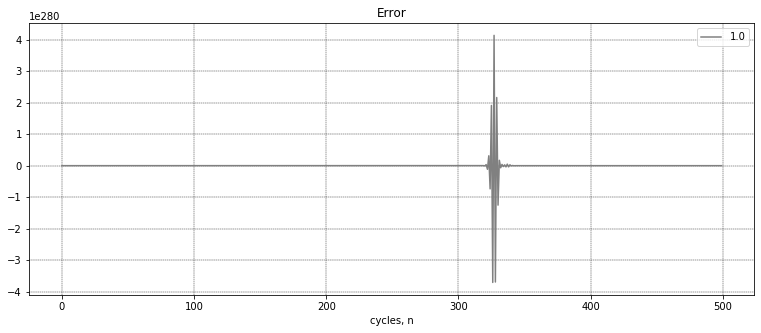

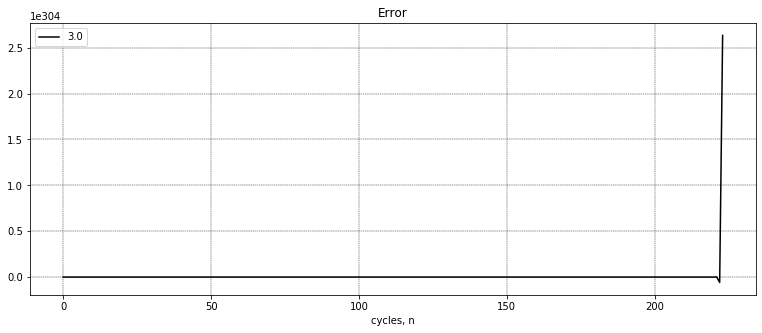

In [5]:
# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Error')
ax.plot(f[:,6],label=mu[6],color='gray')
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Error')
ax.plot(f[:,7],label=mu[7],color='black')
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

It is possible to visualize how faster the error decay with the increase of 𝜇, but once the 𝜇 becomes too big the response of the system becomes unstable, leading to unpredictable result. It is know that this behavior of the LMS filter is due the feedback during the calculation of w (tap weights). One aproach to reduce this problem is using the normalized LMS.

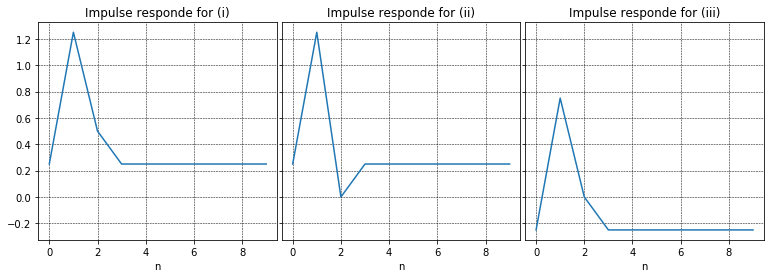

In [6]:
#------------------------------------------------
# h. Chapter 6, problem 18 (So not a choice between 16,17,18 as stated in the PPT)
#------------------------------------------------
# Consider a linear communication channel whose transfer function may take one of three
# possible forms:
# (i) H(z) = 0.25 + z-1 + 0.25z-2
# (ii) H(z) = 0.25 + z-1 - 0.25z-2
# (iii) H(z) = -0.25 + z-1 + 0.25z-2
# The channel output, in response to the input xn, is defined by
# u(n) = sum#k h(k)x(n-k) + v(n),
# where hn is the impulse response of the channel and v(n) is additive white Gaussian noise
# with zero mean and variance s²n = 0.01. The channel input xn consists of a Bernoulli
# sequence with x(n) = +-1.
# The purpose of the experiment is to design an adaptive equalizer trained by using
# the LMS algorithm with step-size parameter m = 0.001. In structural terms, the equalizer
# is built around an FIR filter with 21 taps. For desired response, a delayed version of the
# channel input, namely x(n-Δ), is supplied to the equalizer. For each of the possible transfer
# functions listed under (i), (ii), and (iii), do the following:
# (a) Determine the optimum value of the delay Δ that minimizes the mean-square error at
# the equalizer output.
# (b) For the optimum delay Δ determined in part (a), plot the learning curve of the equalizer
# by averaging the squared value of the error signal over an ensemble of 100 independent
# Monte Carlo runs of the experiment.
#------------------------------------------------
# To solve this exercise lets create the functions:

def func1(x): # (i) H(z) = 0.25 + z-1 + 0.25z-2
    y = np.zeros(x.shape)
    y[0] = 0.25
    y[1] = 0.25 + x[0]
    for i in range(2,y.shape[0],1):
        y[i] = 0.25 + x[i-1] + 0.25 * x[i-2]
    return y

def func2(x): # (ii) H(z) = 0.25 + z-1 - 0.25z-2
    y = np.zeros(x.shape)
    y[0] = 0.25
    y[1] = 0.25 + x[0]
    for i in range(2,y.shape[0],1):
        y[i] = 0.25 + x[i-1] - 0.25 * x[i-2]
    return y

def func3(x): # (iii) H(z) = -0.25 + z-1 + 0.25z-2
    y = np.zeros(x.shape)
    y[0] = -0.25
    y[1] = -0.25 + x[0]
    for i in range(2,y.shape[0],1):
        y[i] = -0.25 + x[i-1] + 0.25 * x[i-2]
    return y

# parameters
n = 10

# check the impulse response:
ent = np.zeros(n)
ent[0] = 1

fig, ax = plt.subplots(1,3,figsize=(13,4),sharey=True)
ax[0].set_title('Impulse responde for (i)')
ax[0].plot(func1(ent))
ax[0].set_xlabel('n'), ax[0].grid(linestyle='--',linewidth='0.5', color='black')
ax[1].set_title('Impulse responde for (ii)')
ax[1].plot(func2(ent))
ax[1].set_xlabel('n'), ax[1].grid(linestyle='--',linewidth='0.5', color='black')
ax[2].set_title('Impulse responde for (iii)')
ax[2].plot(func3(ent))
ax[2].set_xlabel('n'), ax[2].grid(linestyle='--',linewidth='0.5', color='black')
plt.subplots_adjust(hspace = 0., wspace = 0.02)
plt.show()

## Reference

[1] Haykin, S. S. (2012). Adaptive filter theory. Pearson Education.